<a href="https://colab.research.google.com/github/Vikashkrishna/AML_LAB/blob/main/2348571_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [32]:
df = pd.read_csv('/content/program_5_dataset.csv')

In [33]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [34]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [35]:
mode_value = df['PROT'].mode()[0]
df['PROT'].fillna(mode_value, inplace=True)

In [36]:
mode_value = df['CREA'].mode()[0]
df['CREA'].fillna(mode_value, inplace=True)

In [37]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           0
GGT            0
PROT           0
dtype: int64

<ipython-input-65-9cc830d1f3ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


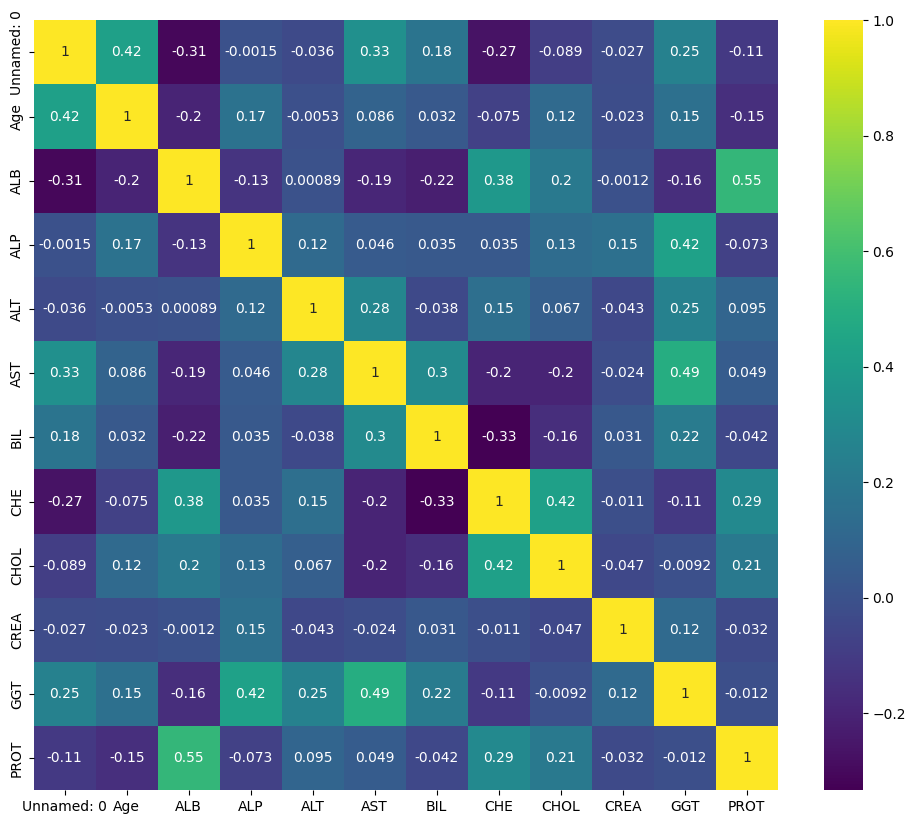

In [65]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix , annot=True , cmap = 'viridis')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
x = df[['CREA']]
y = df['PROT']
model=LinearRegression()
model.fit(x,y)

LinearRegression()

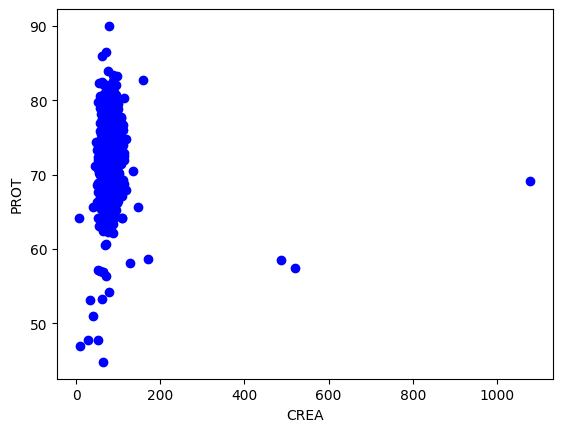

In [66]:
plt.scatter(x,y,color='blue')
plt.xlabel('CREA')
plt.ylabel('PROT')
plt.show()

In [48]:
mode_value = df['ALB'].mode()[0]
df['ALB'].fillna(mode_value, inplace=True)
mode_value = df['ALP'].mode()[0]
df['ALP'].fillna(mode_value, inplace=True)
mode_value = df['CHOL'].mode()[0]
df['CHOL'].fillna(mode_value, inplace=True)
mode_value = df['ALT'].mode()[0]
df['ALT'].fillna(mode_value, inplace=True)
mode_value = df['AST'].mode()[0]
df['AST'].fillna(mode_value, inplace=True)


In [49]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = df.drop(columns=['Unnamed: 0','Category', 'Age', 'Sex'])
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
X_vif

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...
610,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,33.0,52.5,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.2, random_state=42)
model_multiple = LinearRegression().fit(X_train, y_train)

In [55]:
from sklearn.preprocessing import PolynomialFeatures
chosen_attribute = 'CREA'
degrees = [2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[[chosen_attribute]])
    model_poly = sm.OLS(y, X_poly).fit()

In [56]:
from sklearn.linear_model import Ridge, Lasso
alpha_values = np.arange(0.1, 150.1, 10)
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha).fit(X_train[[chosen_attribute]], y_train)

In [57]:
alpha_values_lasso = np.arange(0.1, 100.1, 10)
for alpha_lasso in alpha_values_lasso:
    lasso_model = Lasso(alpha=alpha_lasso).fit(X_train[[chosen_attribute]], y_train)

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model_multiple, X_train, y_train, cv=5)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = model_multiple.predict(X_train)
y_pred_test = model_multiple.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train , mse_test , r2_train , r2_test


(2.2524223570212953e-28, 5.7998592992639465e-28, 1.0, 1.0)

In [62]:
print("Intercept:", model_multiple.intercept_)
print("Coefficient:", model_multiple.coef_)


Intercept: 0.0
Coefficient: [ 7.29619340e-16  2.22044605e-16  3.18321758e-16 -5.55111512e-17
  4.16333634e-16 -4.37150316e-16 -6.93889390e-17  9.71445147e-17
 -2.49800181e-16  1.00000000e+00]
